In [7]:
%matplotlib inline
%import_all -v

from scipy.optimize import curve_fit

from __future__ import (absolute_import, division, print_function, unicode_literals)
from IPython.display import display
import astropy
from astropy import constants, units as u
from astropy.io import ascii, fits
from astropy.table import Column, MaskedColumn, QTable, Table
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from plottools.plotutils import savefig, update_rcParams
update_rcParams()


In [46]:
# bias = ascii.read('../subfind_bias.txt')
print(bias)

def f1(x, a, b, c):
    return a + b*x**c

def f2(x, a, b, c):
    if c <= 0:
        return np.inf
    return a + b*np.log10(c*x)

def f3(x, a, b, c=5):
    """Based on henk's f_contam"""
    if b <= 0 or c <= 0:
        return np.inf
    return a * ((1/(x+b)) - (1/(b+c)))

functions = [f1, f2, f3]

D/Rhost dm/m200
------- -------
  0.274  -0.725
  0.686   -0.43
  1.099  -0.197
  1.376  -0.113


In [47]:
fit = [curve_fit(f, bias['D/Rhost'], bias['dm/m200'], p0=(-1.5,-1.2,0.5))
       for f in functions[:2]]
fit.append(curve_fit(f3, bias['D/Rhost'], bias['dm/m200'], p0=(-1.5,0.7)))

for i in range(len(fit)):
    print(i, fit[i][0])

0 [-1.44851534  1.18944042  0.38593244]
1 [ 0.00324845  0.87893577  0.52021648]
2 [-0.39424857  0.21212375]


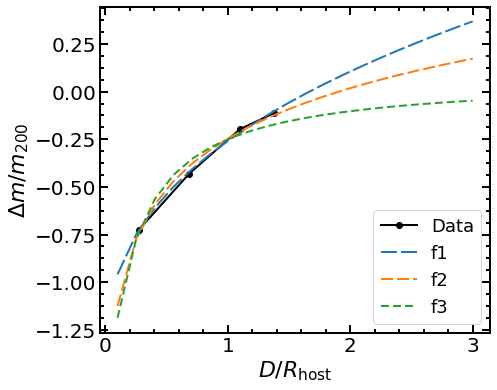

In [48]:
R = np.linspace(0.1, 3, 20)
fig, ax = plt.subplots(figsize=(7,6))
ax.plot(bias['D/Rhost'], bias['dm/m200'], 'ko-', lw=2, label='Data')
for i, p in enumerate(fit):
    ax.plot(R, functions[i](R, *p[0]), 'C{0}'.format(i), dashes=(8-2*i,2),
            label='f{0}'.format(i+1))
ax.set_xlabel('$D/R_\mathrm{host}$')
ax.set_ylabel('$\Delta m/m_{200}$')
ax.legend(loc='lower right')

$$\frac{\Delta m}{m_{200}} = X$$
$$\Delta m = m_\mathrm{obs} - m_{200} = m_{200}X$$
$$m_\mathrm{obs} = (1+X)m_{200}$$
$$m_{200} = \frac{m_\mathrm{obs}}{1+X}$$